# Client

## Installation

```pip install openai```

Get your key on https://platform.openai.com/api-keys

After you need to instantiate a OpenAI object to load the client used to reach endpoints.

In [2]:
from dotenv import load_dotenv
import os
from openai import OpenAI

# Load the key
load_dotenv()
OPENAI_KEY = os.getenv("OPENAI_KEY")

# Create a client
client = OpenAI(api_key=OPENAI_KEY)


Liste des modèles disponibles :
https://platform.openai.com/docs/models

In [27]:
from enum import Enum

class LlmModel(Enum):
    GPT_4O = "gpt-4o"
    GPT_4O_MINI = "gpt-4o-mini"
    GPT_4_TURBO = "gpt-4-turbo"
    GPT_4 = "gpt-4"
    GPT_3_5_TURBO = "gpt-3.5-turbo"
    GPT_3_5_TURBO_16K = "gpt-3.5-turbo-16k"
    WHISPER = "whisper"


In [28]:
def get_response(content: str, model: str = LlmModel.GPT_4O_MINI.value, temperature: int = 2, max_tokens: int = 100) -> str:
    """
    Request the openai chat completions endpoint with a user prompt and return the message content from the assistant.
    Select your OpenAI model, temperature and max tokens parameters.
    """
    response = client.chat.completions.create(
        model = model,
        messages = [
            {
                "role": "user",
                "content": content,
                "temperature": temperature,
                "max_tokens": max_tokens,
            }
        ]
    )
    return response.choices[0].message.content

# Endpoints

OpenAi API has differents endpoints to make requests on differents services. Here's some of theses endpoints :
- `chatbot` openai.chat.completions.create
    - Question/Answering
    - Find & Replace
    - Text Summarization
    - Content generation
    - Sentiment analysis & Classification
    - Translation
- `moderation` openai.moderations.create
- `audio transcript` openai.audio.transcriptions.create
- `audio translation` openai.audio.translations.create

## chat.completions

### Roles

There is 3 main roles:
- system : Controls the assistant behaviour
- user : Prompt sent to the assistant by the user
- assistant : Chat completion by the assistant

#### Assistant behaviour (system)

In [ ]:
# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_tokens=150,
  messages=[
    {"role": "system",
     "content": "You are a helpful data science tutor."},
    {"role": "user",
    "content": "What is the difference between a for loop and a while loop?"}
  ]
)

# Extract the assistant's text response
print(response.choices[0].message.content)

#### In context learning / RAG

In context learning can helps guide the model to answer without specific fine-tuning. It is quite similar to RAG.<br>
The **crucial part** is to add to the system prompt a clear instruction as : `Answer following the style used in the previous example(s).`<br>
This way, the chat will look the previous part of conversation including an example.<br>
Show him how :
- To structure its answer
- The response style
- You can also add advance double turn to get a first response and then add another set of instructions

In [10]:
response = client.chat.completions.create(
   model="gpt-4o-mini",
   # Add a user and assistant message for in-context learning
   messages=[
     {"role": "system", "content": "You are a helpful Python programming tutor."},
     {"role": "user", "content": "Explain what the type() function does."}
   ]
)

print(response.choices[0].message.content)

The `type()` function in Python is a built-in function that is used to determine the type of an object. When you provide an object as an argument to `type()`, it returns the type of that object. This can be useful for debugging or understanding what kind of data you are working with.

Here's how you can use it:

1. **Basic Usage**:
   ```python
   x = 5
   print(type(x))  # Output: <class 'int'>
   ```

2. **With Different Data Types**:
   ```python
   y = 3.14
   print(type(y))  # Output: <class 'float'>

   z = "Hello, World!"
   print(type(z))  # Output: <class 'str'>

   my_list = [1, 2, 3]
   print(type(my_list))  # Output: <class 'list'>
   ```

3. **With Custom Classes**:
   If you define a custom class, the `type()` function will return the class you defined:
   ```python
   class MyClass:
       pass

   obj = MyClass()
   print(type(obj))  # Output: <class '__main__.MyClass'>
   ```

4. **Checking if Two Types are Equal**:
   You can also use `type()` in conditional expressio

In [14]:
response = client.chat.completions.create(
   model="gpt-4o-mini",
   # Add a user and assistant message for in-context learning
   messages=[
     {"role": "system", "content": "You are a Python tutor. Answer following the style used in the previous example."}, # This Part is CRUCIAL
     {"role": "user", "content": "Explain me what the int() function does"},
     {"role": "assistant", "content": """
     1. Input : The int() take as an input an object and try to evaluate it as an integer.
     2. Output : By example, int('5'), will return successfully 5.
     """},
     {"role": "user", "content": "Explain what the type() function does."}
   ]
)

print(response.choices[0].message.content)

1. **Purpose**: The `type()` function is used to determine the type of an object in Python.

2. **Input**: It takes a single argument, which can be any Python object (like a number, string, list, etc.).

3. **Output**: It returns the type of the provided object as a type object. For example, `type(5)` will return `<class 'int'>`, indicating that the object is an integer. 

4. **Usage**: This function is useful for debugging and understanding the nature of variables in your code.


### Creating a chatbot

In [15]:
messages = [{"role": "system", "content": "You are a helpful math tutor."}]
user_msgs = ["Explain what pi is.", "Summarize this in two bullet points."]

for q in user_msgs:
    print("User: ", q)
    
    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    messages.append(user_dict)
    
    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        max_tokens=100
    )
    
    # Convert the assistant's message to a dict and append to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    messages.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

User:  Explain what pi is.
Assistant:  Pi (π) is a mathematical constant that represents the ratio of a circle's circumference to its diameter. This means that for any circle, if you divide the circumference (the distance around the circle) by the diameter (the distance across the circle through its center), you will always get the same value, which is approximately 3.14159.

Here are some key points about pi:

1. **Irrational Number**: Pi is an irrational number, which means it cannot be expressed as 

User:  Summarize this in two bullet points.
Assistant:  - Pi (π) is the ratio of a circle's circumference to its diameter, approximately equal to 3.14159.
- It is an irrational number, meaning it cannot be expressed as a simple fraction and its decimal representation goes on forever without repeating. 



### Completion

In [19]:
# Most likely complete the prompt if you don't specify any instructions depending of the temperature parameter to add verbose
content = get_response(content="Life is like a box of chocolates.", temperature=5)
print(content)
content = get_response(content="Life is like a box of chocolates.", temperature=0)
print(content)

"Life is like a box of chocolates" is a famous quote from the movie *Forrest Gump*. It suggests that life is full of surprises and unpredictability, much like a box of assorted chocolates where you never know what you're going to get. Each experience can be sweet or bittersweet, and it emphasizes the importance of embracing whatever comes your way. How do you interpret this idea?
"Life is like a box of chocolates; you never know what you're gonna get." This famous quote from the movie *Forrest Gump* suggests that life is full of surprises and unpredictable moments. Just as each chocolate has a different filling, each experience in life can bring both joy and challenge. It captures the essence of embracing uncertainty and being open to whatever comes your way. What are your thoughts on this metaphor?


### Q/A

In [ ]:
response = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages = [
        {
            "role": "user",
            "content": "How works the endpoints in openai module for python?"
        }
    ]
)

print(response)

ChatCompletion(id='chatcmpl-B9RjXbnvGqgM4nIkTth1P2XmQ8CHZ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The OpenAI Python module provides a set of endpoints that allow you to interact with OpenAI\'s API services, including text generation, image generation, and other functionalities. Here’s a basic overview of how the endpoints work in the OpenAI Python module:\n\n### Installation\n\nFirst, ensure you have the OpenAI Python package installed. You can install it using pip:\n\n```bash\npip install openai\n```\n\n### Setting Up\n\nTo use the OpenAI module, you need to set up your API key. You can do this by setting it directly in your code or by using environment variables.\n\n```python\nimport openai\n\n# Set your OpenAI API key\nopenai.api_key = \'your-api-key-here\'\n```\n\n### Common Endpoints\n\n1. **Text Completion** (e.g., using the GPT model)\n\n   You can generate text with the `Completion.create()` method. Here’s how it ty

In [ ]:
print(response.choices[0].message.content)

I'm unable to browse the internet or access websites, including the OpenAI documentation, as my knowledge was last updated in October 2021. However, I can provide you with a general overview of how endpoints typically work in the OpenAI Python module based on the information available up to that time.

The OpenAI Python module allows you to interact with various AI models, including GPT-3, by making requests to different endpoints. Here’s how it generally works:

1. **Installation**: You start by installing the OpenAI Python package using pip:
   ```bash
   pip install openai
   ```

2. **Authentication**: You need to set your API key to authorize requests. You can do this by setting the `OPENAI_API_KEY` environment variable or directly in your script:
   ```python
   import openai
   openai.api_key = 'your-api-key'
   ```

3. **Endpoints**:
   - **Completion endpoint**: This is used to generate text completions based on a prompt. You can call it like so:
     ```python
     response =

### Find & Replace

In [ ]:
# Find & replace task
prompt="""
Replace car with plane and adjust phrase in the following text:

A car is a vehicle that is typically powered by an internal combustion engine or an electric motor.
It has four wheels, and is designed to carry passengers and/or cargo on roads or highways.
Cars have become a ubiquitous part of modern society, and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods.
Cars are often associated with freedom, independence, and mobility.
"""

content = get_response(content=prompt, temperature=2, max_tokens=100)
print(content)


A plane is a vehicle that is typically powered by jet engines or propellers. It has wings and is designed to carry passengers and/or cargo through the air. Planes have become a ubiquitous part of modern society and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods. Planes are often associated with freedom, independence, and mobility.


### Text Summarization

In [ ]:
# Summarize
prompt="""
Summarize the following text into two concise bullet points:

Investment refers to the act of committing money or capital to an enterprise with the expectation of obtaining an added income or profit in return.
There are a variety of investment options available, including stocks, bonds, mutual funds, real estate, precious metals, and currencies.
Making an investment decision requires careful analysis, assessment of risk, and evaluation of potential rewards.
Good investments have the ability to produce high returns over the long term while minimizing risk.
Diversification of investment portfolios reduces risk exposure.
Investment can be a valuable tool for building wealth, generating income, and achieving financial security.
It is important to be diligent and informed when investing to avoid losses.
"""

content = get_response(content=prompt, temperature=2, max_tokens=100)
print(content)

- Investment involves committing capital to various options—such as stocks, bonds, and real estate—with the aim of generating profit, requiring careful analysis of risks and rewards.  
- Effective investment strategies, including diversification, can enhance long-term returns and financial security while minimizing the risk of losses.


### Content generation

In [ ]:
# Content generation. Increase temperature if you want more diversity
prompt="Do create a slogan for a new italian restaurant in Paris city"

content = get_response(content=prompt, temperature=10, max_tokens=20)
print(content)

"Authentic Italian Flavors, Right in the Heart of Paris!"


### Classification
Assigning a label to information provided into the promt
- Sentiment analysis (binary, ordinal, etc...)
- 

In [ ]:
# Define a multi-line prompt to classify sentiment
prompt = """Classify the following statement as either negative, neutral or positive sentiment:
1. Unbelievably good!
2. Shoes fell apart on the second use.
3. The shoes look nice, but they aren't very comfortable.
4. Can't wait to show them off!"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_tokens=100
)

print(response.choices[0].message.content)

1. Positive
2. Negative
3. Neutral
4. Positive


In [ ]:
# Define a prompt for the categorization
prompt = "Classify the following companies in four categories as Tech, Energy, Luxury Goods and Investment: Apple, Microsoft, Saudi Aramco, Alphabet, Amazon, Berkshire Hathaway, NVIDIA, Meta, Tesla, LVMH"

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_tokens=100,
  temperature=0.5
)

print(response.choices[0].message.content)

Here’s the classification of the companies into the specified categories:

**Tech:**
- Apple
- Microsoft
- Alphabet
- Amazon
- NVIDIA
- Meta

**Energy:**
- Saudi Aramco
- Tesla (also classified under Tech due to its innovation in technology and electric vehicles)

**Luxury Goods:**
- LVMH

**Investment:**
- Berkshire Hathaway

Let me know if you need any further information!


## moderations

In [20]:
# Create a request to the Moderation endpoint
response = client.moderations.create(
    model="text-moderation-latest",
    input="My favorite book is To Kill a Mockingbird."
)

# Print the category scores
print(response.results[0].category_scores)

CategoryScores(harassment=5.243551186140394e-06, harassment_threatening=1.1516095810293336e-06, hate=4.767837526742369e-05, hate_threatening=3.2021056028952444e-08, illicit=None, illicit_violent=None, self_harm=9.466615438213921e-07, self_harm_instructions=5.426785065765216e-08, self_harm_intent=1.5536235764557205e-07, sexual=3.545879735611379e-06, sexual_minors=1.1304399549771915e-06, violence=0.0001064608441083692, violence_graphic=1.086988686438417e-05, self-harm=9.466615438213921e-07, sexual/minors=1.1304399549771915e-06, hate/threatening=3.2021056028952444e-08, violence/graphic=1.086988686438417e-05, self-harm/intent=1.5536235764557205e-07, self-harm/instructions=5.426785065765216e-08, harassment/threatening=1.1516095810293336e-06)


## audio

### audio.transcriptions

In [22]:
# Open the audio.m4a file
audio_file = open("audio-portuguese.m4a", "rb")

# Create a transcript from the audio file
response = client.audio.transcriptions.create(model="whisper-1", file=audio_file)

print(response.text)

Olá, o meu nome é Eduardo, sou CTO no Datacamp. Espero que esteja a gostar deste curso que o James e eu criamos para você. Esta API permite enviar um áudio e trazer para inglês. O áudio original está em português.


### audio.translations

In [23]:
# Open the audio.m4a file
audio_file = open("audio-portuguese.m4a", "rb")

# Write an appropriate prompt to help the model
prompt = "The audio file relates to a recent Bank World report"

# Create a translation from the audio file
response = client.audio.translations.create(model="whisper-1",
                                            file=audio_file,
                                            prompt=prompt)

print(response.text)

Hello, my name is Eduardo, I am a CTO at Datacamp. I hope you are enjoying this course that James and I have created for you. This API allows you to send an audio and bring it to English. The original audio is in Portuguese.


# Prompts

## Prompt styles

- Zero Shot prompting : Just provide a single question without label
- Over Prompting : Improve the zero shot prompting by giving multiple related questions (utile avec un dataset)
- One Shot prompting : One example with label provided
- Few Shot prompting : Many examples with labels provided
- Multi Step prompting : Useful for tasks requiring a series of actions or cognitive processing.

In [10]:
prompt = """
Write a bullet list composed with a key - value pair with each key being a prompt style and the value being the situation where it is useful for the following keys :
- Zero Shot Prompting
- Over Prompting
- One Shot Prompting
- Few Shot Prompting
- Multi Step Prompting

Format the output for each key - value pair according to this example:
- Multi Step Prompting : Useful for tasks requiring a series of actions or cognitive processing.
"""

In [11]:
content = get_response(content=prompt, max_tokens=500)
print(content)

- Zero Shot Prompting : Useful for tasks where the model must generate responses without prior examples, such as answering general knowledge questions.
- Over Prompting : Useful for situations that require detailed instructions and context, ensuring comprehensive understanding and specificity in responses.
- One Shot Prompting : Useful for tasks where a single example can clarify context or format, such as generating a specific kind of text based on a provided instance.
- Few Shot Prompting : Useful for scenarios that benefit from multiple examples for better comprehension, like recognizing patterns or guidelines across similar tasks.
- Multi Step Prompting : Useful for tasks requiring a series of actions or cognitive processing, such as solving a math problem or writing an essay in stages.


In [12]:
prompt = """
Write a bullet list composed with a key - value pair with each key being a prompt style and the value being the machine learning task associated according to the following keys :
- Zero Shot Prompting
- Over Prompting
- One Shot Prompting
- Few Shot Prompting
- Multi Step Prompting

Format the output for each key - value pair according to this example:
- Few Shot Prompting : Useful for classification tasks.
"""

In [13]:
content = get_response(content=prompt, max_tokens=500)
print(content)

- Zero Shot Prompting : Useful for tasks where the model must understand and generate responses without prior examples, such as intent detection.
- Over Prompting : Often results in excessive guidance, which can lead to overfitting on specific instructions rather than generalizing, suitable for fine-tuning.
- One Shot Prompting : Helpful for tasks that require a single example to infer a response, such as generating text with a specific tone or style.
- Few Shot Prompting : Useful for classification tasks where a couple of examples can help the model learn to categorize new instances.
- Multi Step Prompting : Suitable for complex tasks that require sequential reasoning or chaining of multiple responses, such as mathematical problem solving or multi-turn dialogue generation.


In [14]:
# Create a prompt detailing steps to plan the trip
prompt = """
     Help me plan a beach vacation.
     Step 1 - Specify four potential locations for beach vacations
     Step 2 - State some accommodation options in each
     Step 3 - State activities that could be done in each
     Step 4 - Evaluate the pros and cons for each destination
    """

response = get_response(prompt)
print(response)

Sure! Let’s plan your beach vacation step by step:

### Step 1: Specify Four Potential Locations for Beach Vacations

1. **Maui, Hawaii, USA**
2. **Cancun, Mexico**
3. **Bora Bora, French Polynesia**
4. **Gold Coast, Australia**

### Step 2: State Some Accommodation Options in Each

#### Maui, Hawaii
- **Options:**
   - The Ritz-Carlton, Kapalua
   - Hyatt Regency Maui Resort and Spa
   - Airbnbs or vacation rentals (oceanfront properties)

#### Cancun, Mexico
- **Options:**
   - Grand Fiesta Americana Coral Beach
   - Hilton Cancun
   - All-inclusive resorts like Moon Palace Cancun

#### Bora Bora, French Polynesia
- **Options:**
   - Four Seasons Resort Bora Bora
   - InterContinental Bora Bora Resort & Thalasso Spa
   - Overwater bungalows through Airbnbs or local companies

#### Gold Coast, Australia
- **Options:**
   - The Star Gold Coast
   - Sheraton Grand Mirage Resort
   - Beachfront apartments or hostels

### Step 3: State Activities That Could Be Done in Each

#### Maui, Haw

### COT

#### OneShot

In [26]:
prompt = "Find the solution to this mathematical problem: Sum the even numbers in the following set: {15, 13, 82, 7, 14}"
response = get_response(prompt, model = llm_model.GPT_3_5_TURBO.value)
print(response)

The even numbers in the set are 82 and 14. 

82 + 14 = 96

The sum of the even numbers in the set {15, 13, 82, 7, 14} is 96.


In [18]:
# Define the example 
example = """Q: Sum the even numbers in the following set: {9, 10, 13, 4, 2}.
             A: Even numbers: {10, 4, 2}. Adding them: 10+4+2=16"""

# Define the question
question = """Q: Sum the even numbers in the following set: {15, 13, 82, 7, 14}
              A:"""

# Create the final prompt
prompt = example + question
response = get_response(prompt)
print(response)

Even numbers: {82, 14}. Adding them: 82 + 14 = 96.


#### Self-Consistency

In [ ]:
# Create the self_consistency instruction
self_consistency_instruction = """
Solve step by step the following problem delimited by triple backticks with three independant experts and combine the results with a majority vote
"""

# Create the problem to solve
problem_to_solve = "```If you own a store that sells laptops and mobile phones. You start your day with 50 devices in the store, out of which 60% are mobile phones. Throughout the day, three clients visited the store, each of them bought one mobile phone, and one of them bought additionally a laptop. Also, you added to your collection 10 laptops and 5 mobile phones. How many laptops and mobile phones do you have by the end of the day?```"

# Create the final prompt
prompt = get_response(self_consistency_instruction+problem_to_solve)

response = get_response(prompt)
print(response)

## OverPrompt (GPT)

### **Résumé de l'article "OverPrompt: Enhancing ChatGPT through Efficient In-Context Learning"**

#### **Contexte et Problématique**
Les grands modèles de langage (LLMs) comme ChatGPT offrent des performances impressionnantes en traitement du langage naturel. Cependant, leur utilisation en entreprise est limitée par les coûts élevés en temps et en jetons lorsqu'ils sont interrogés via une API. L'approche classique du **zero-shot prompting** repose sur la description détaillée de la tâche, ce qui génère une consommation excessive de jetons. 

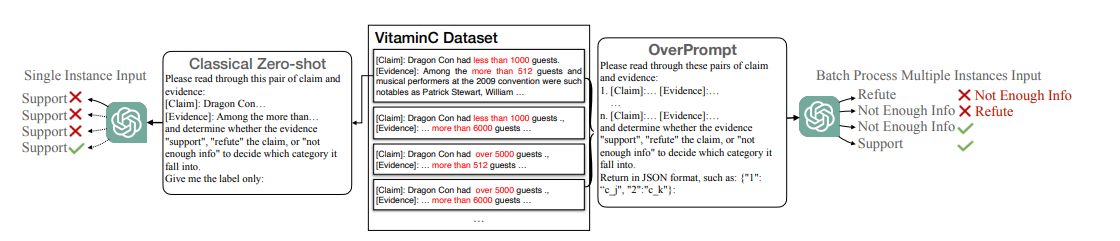


#### **Objectif de l'étude**
Les auteurs proposent **OverPrompt**, une stratégie de zero-shot prompting plus efficace, exploitant l’apprentissage en contexte (**in-context learning, ICL**) pour traiter plusieurs entrées en une seule requête. Cette approche vise à :
- **Réduire** le coût en jetons et en temps.
- **Améliorer** les performances en classification.
- **Optimiser** la manière dont les LLMs utilisent l'information contextuelle.

#### **Méthodologie**
L'étude compare OverPrompt à la méthode traditionnelle de classification zero-shot sur **dix ensembles de données** de classification textuelle (fact-checking, analyse de sentiment, inférence textuelle, etc.). Les auteurs mesurent :
- Le **temps moyen par instance**.
- Le **coût en jetons**.
- La **précision et le score F1** des classifications.

OverPrompt regroupe plusieurs entrées dans une seule requête, en évitant de répéter la description de la tâche pour chaque instance. Cela permet aux LLMs d’exploiter les liens entre différentes entrées, améliorant ainsi leur capacité d’inférence.

#### **Résultats Clés**
1. **Réduction des coûts et du temps**
   - Le coût en jetons diminue significativement (jusqu'à **40% d’économie**).
   - Le temps de traitement par instance diminue également (ex: **1.37s → 0.35s sur FEVER**).

2. **Amélioration des performances**
   - Sur les tâches de **fact-checking** (FEVER, VitaminC), OverPrompt améliore la précision (**+10% à +20%**).
   - En **analyse de sentiment**, les performances restent **stables** voire améliorées.
   - Toutefois, sur les tâches d’**inférence textuelle** (ex: RTE), l’ajout d’exemples supplémentaires ne conduit pas toujours à de meilleures performances.

3. **Impact du regroupement des entrées**
   - L'organisation des entrées en **groupes sémantiques similaires** améliore les résultats.
   - Des cas d’étude montrent que des **réponses plus cohérentes** émergent lorsque les phrases sont traitées ensemble.

4. **Résilience aux variations d’entrée**
   - Les permutations des entrées n'affectent **pas** significativement les performances, montrant la robustesse de la méthode.

#### **Limitations et Perspectives**
- **Moins efficace pour les tâches nécessitant un long contexte** (résumé, QA fermée).
- **Sensibilité aux longues instructions**, ce qui peut nuire aux performances.
- Les auteurs suggèrent d'optimiser le **regroupement des entrées** et d'explorer des méthodes de segmentation pour les tâches complexes.

#### **Conclusion**
OverPrompt propose une amélioration notable du zero-shot prompting en optimisant le traitement des entrées multiples. Cette approche permet d’allier **efficacité** et **performance**, tout en réduisant l’impact carbone des LLMs.

---

Si tu veux un résumé plus détaillé sur un aspect précis, dis-moi ! 😊